### Import Essential Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Install Kaggle

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezabinayiaan","key":"e4252e5c64d017ba2aedfc49cd806616"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

### Download Dataset

In [6]:
!kaggle datasets download abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 371kB/s]


In [7]:
!ls

kaggle.json  salary-dataset-simple-linear-regression.zip  sample_data


In [8]:
!unzip salary-dataset-simple-linear-regression.zip

Archive:  salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [9]:
!ls

kaggle.json	    salary-dataset-simple-linear-regression.zip
Salary_dataset.csv  sample_data


### Load Dataset

In [10]:
df = pd.read_csv('Salary_dataset.csv')
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [11]:
df.shape

(30, 3)

#### Split Feature and Target

In [33]:
x = df['YearsExperience']
y = df['Salary']
x = x.values
y = y.values

#### Plot Dataset

<function matplotlib.pyplot.show(*args, **kw)>

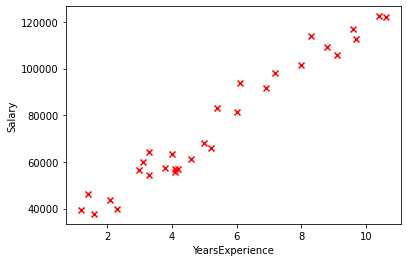

In [34]:
plt.scatter(x, y, marker='x', c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show

#### Initial Coefficient

In [35]:
# initial w & b for f(x)
w = 0
b = 0

#### Cost Function for Single Variable

In [36]:
def cost_func(x, y, w, b):
  m = x.shape[0]
  f = np.dot(x, w) + b
  total_cost = np.sum((f - y) ** 2) / (2 * m)
  return total_cost

In [37]:
total_cost = cost_func(x, y, w, b)
print(total_cost)

3251553638.866667


#### Impleament Gradient Descent

In [38]:
def derivation(x, y, w, b):
  m = x.shape[0]
  f = np.dot(x, w) + b
  dj_dw = np.dot((f - y), x) / m
  dj_db = np.sum((f - y)) / m
  return dj_dw, dj_db

#### Run Gradient Descent

In [39]:
alpha = 0.03
epoch = 500
cost = []
w_hist = []
b_hist = []
for i in range(epoch):
  w_hist.append(w)
  b_hist.append(b)
  dj_dw, dj_db = derivation(x, y, w, b)
  w = w - (alpha * dj_dw)
  b = b - (alpha * dj_db)
  c = cost_func(x, y, w, b)
  cost.append(c)
  if i % 100 == 0:
    print(c)
print("final w: {} and b {}".format(w, b))

129593194.26791173
31510504.560094595
20244086.728142478
16973381.733704254
16023877.523918528
final w: 9603.022862240452 and b 23805.323542271355


#### Plot Cost Function by Epochs

<function matplotlib.pyplot.show(*args, **kw)>

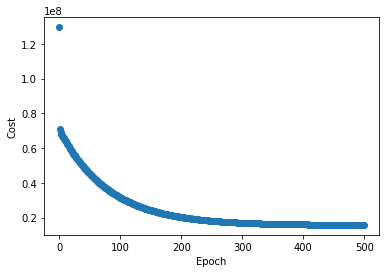

In [40]:
plt.scatter(np.arange(epoch), cost)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show

#### Predict

In [41]:
pred = np.array(np.dot(x, w)+b)
pred.shape

(30,)

#### Plot Prediction

<function matplotlib.pyplot.show(*args, **kw)>

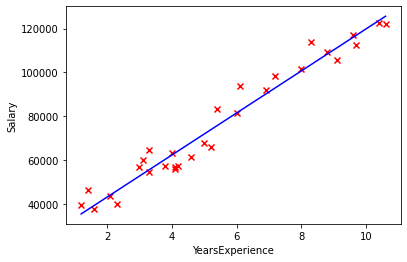

In [42]:
plt.plot(x, pred, c='b')
plt.scatter(x, y, marker='x', c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show

### Polynomial

In [43]:
x_squer = x ** 2
x_squer.shape

(30,)

#### Add $x^2$ to Features 

In [44]:
x = np.concatenate((x.reshape(30, 1), x_squer.reshape(30, 1)), axis=1)
x.shape

(30, 2)

In [45]:
w = np.ones(x.shape[1])
b = 1

In [46]:
w.shape

(2,)

In [47]:
cost = cost_func(x, y, w, b)
print(cost)

3247304010.9742327


In [48]:
dj_dw, dj_db = derivation(x, y, w, b)
dj_dw

array([ -484669.01973333, -3687386.16713333])

#### Run

In [49]:
alpha = 0.0003
epoch = 10000
cost = []
for i in range(epoch):
  dj_dw, dj_db = derivation(x, y, w, b)
  w = w - (alpha * dj_dw)
  b = b - (alpha * dj_db)
  c = cost_func(x, y, w, b)
  cost.append(c)
  if i % 1000 == 0:
    print(c)
print("final w: {} and b {}".format(w, b))

683662008.9391148
92975212.63624433
33768279.22921746
25637971.13551215
24345843.966639504
23973976.234590564
23730579.851207152
23509592.661301263
23296685.847254165
23089805.543820415
final w: [15480.21371644  -461.76369429] and b 8567.987528094873


#### Plot Cost by Epochs

<function matplotlib.pyplot.show(*args, **kw)>

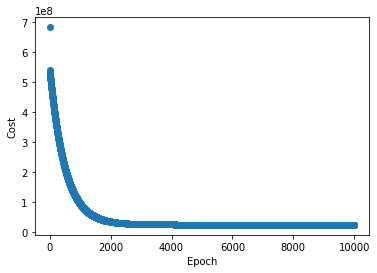

In [50]:
plt.scatter(np.arange(epoch), cost)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show

#### Predict

In [51]:
pred = np.dot(x, w)+b
pred.shape

(30,)

#### Plot Prediction

<function matplotlib.pyplot.show(*args, **kw)>

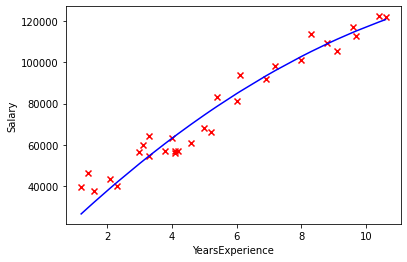

In [52]:
plt.plot(x[:,0], pred, c='b')
plt.scatter(x[:,0], y, marker='x', c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show